**Author: Vighnesh Vaigankar**
Task1: Prediction using supervised machine learning GRIP@ The Sparks foundation In this regression task I tried to predict the percentage of marks that a students is expected to score based upon the number of hours they studied.

This is a simple regression task as it involves just two variables.

**importing** **the** **required** **libraries**


In [55]:
[1] # Importing necessary libraries in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the Data from Source.**

In [56]:
[2] # Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

# Checking first 10 data points of the dataset
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


We can check some properties of the given dataset and if there exists any missing values in the same.

In [57]:
print('statistical properties of the dataset:')
s_data.describe()


statistical properties of the dataset:


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [58]:
print('number of rows and columns in the data')
s_data.shape

number of rows and columns in the data


(25, 2)

In [59]:
print('Checking the existence of missing or null values')
s_data.isnull().sum()

Checking the existence of missing or null values


Hours     0
Scores    0
dtype: int64

We are going to plot our given data set on a two dimentional scatter diagram to check if we can manually find any relationship between Hours Studied and Percentage Score for a student..

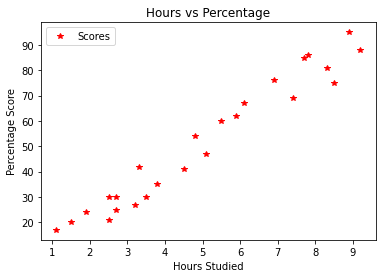

In [60]:
# Scatter diagram for hours studied vs. percentage scores of students
s_data.plot(x='Hours', y='Scores', style='*',color="r")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the above graph,we can conclude that there is a positive linear relationship between the Hours studied and Persentage** **scores**

Now,we are reshaping the data by dividing into "attributes"(inputs)and "labels"(outputs).

In [61]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

Next,we need to split the data into training and test sets.We will do this by using Scikit-Learn's built-in train_test_split()method.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training the Algorithm**

We will now train our algorithm

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training complete.")


Training complete.


**Plotting Regression Line along with the data points**

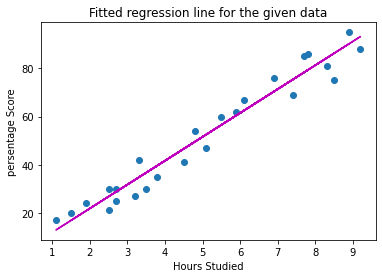

In [64]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color="m")
plt.title('Fitted regression line for the given data')
plt.xlabel('Hours Studied')
plt.ylabel('persentage Score')
plt.show()

**Making Predictions**

We have completed training our algorithm,thereafter we try to make predictions based on our test set data.

In [65]:
print(X_test) # Testing data 
y_pred = lr.predict(X_test) # Predicting the scores
print("The predicted scores based on the testing dataset is: ",y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
The predicted scores based on the testing dataset is:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [66]:
# Checking the accuracy of the model
lr.score(X_test,y_test)

0.9454906892105354

Therefore accuracy of the model is 94.5%.

**Comparing the Actual and the Predicted Scores**

In [67]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Comparing the Actual and the Predicted Scores using a Bar Diagram**

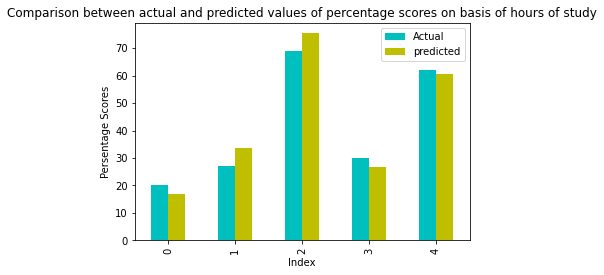

In [68]:
# Bar diagram showing actual and predicted scores of students
df.plot(kind="bar",color=("c","y"))
plt.xlabel("Index")
plt.ylabel("Persentage Scores")
plt.title("Comparison between actual and predicted values of percentage scores on basis of hours of study")
plt.show()

**Predicting the Percentage Score of a student who studies for 9.25 hours a day**

In [69]:
# Testing the model with our own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluation the model**

We try to evaluate the performance of our algorithm.

In [70]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


**CONCLUSION**
I was succesfully able to carry out the prediction using supervised ML task and was able to evaluate the model's performance on various parameters.

**Thank you**